In [1]:
import pandas as pd

# Load the uploaded datasets
file1_path = '../Results/gemini_with_grounding_results_raw.csv'
file2_path = '../Results/gemini_with_local_dataset_results_raw.csv'

# Reading the datasets
dataset1 = pd.read_csv(file1_path)
dataset2 = pd.read_csv(file2_path)

# Display the first few rows of each dataset to understand their structure
dataset1_head = dataset1.head()
dataset2_head = dataset2.head()

dataset1_shape = dataset1.shape
dataset2_shape = dataset2.shape

print(dataset1_shape, dataset2_shape)

(2913, 17) (2912, 17)


In [5]:
# Replace 'No information found' and similar values explicitly
dataset1 = dataset1.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)
dataset2 = dataset2.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)

# Re-check for missing values to confirm the operation
missing_values1 = dataset1.isna().sum()
missing_values2 = dataset2.isna().sum()

print(missing_values1)


Unnamed: 0                    0
id                            0
Firm_Name                     0
Registered_Address          229
CEO                        1780
Establishment_Year         1723
Number_Of_Employees         793
Revenue_Size               1323
Website                      42
NAICS_Code                 2279
SIC_Code                   2375
Status                      645
Dissolvement_Year          2038
Company_Type                465
Previous_Names             1982
Alternative_Names          1930
Key_Executive_Personnel    1683
dtype: int64


/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/2253366090.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset1 = dataset1.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/2253366090.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset2 = dataset2.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)


In [6]:
print(missing_values2)

Unnamed: 0                    0
id                            0
Firm_Name                     0
Registered_Address          434
CEO                         904
Establishment_Year          549
Number_Of_Employees         219
Revenue_Size                720
Website                      99
NAICS_Code                 1180
SIC_Code                   1095
Status                      398
Dissolvement_Year           162
Company_Type                125
Previous_Names              100
Alternative_Names           100
Key_Executive_Personnel     539
dtype: int64


In [32]:
dataset1 = dataset1.drop(['Unnamed: 0'], axis=1)
dataset2 = dataset2.drop(['Unnamed: 0'], axis=1)

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/475637190.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset1 = dataset1.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/475637190.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset2 = dataset2.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)


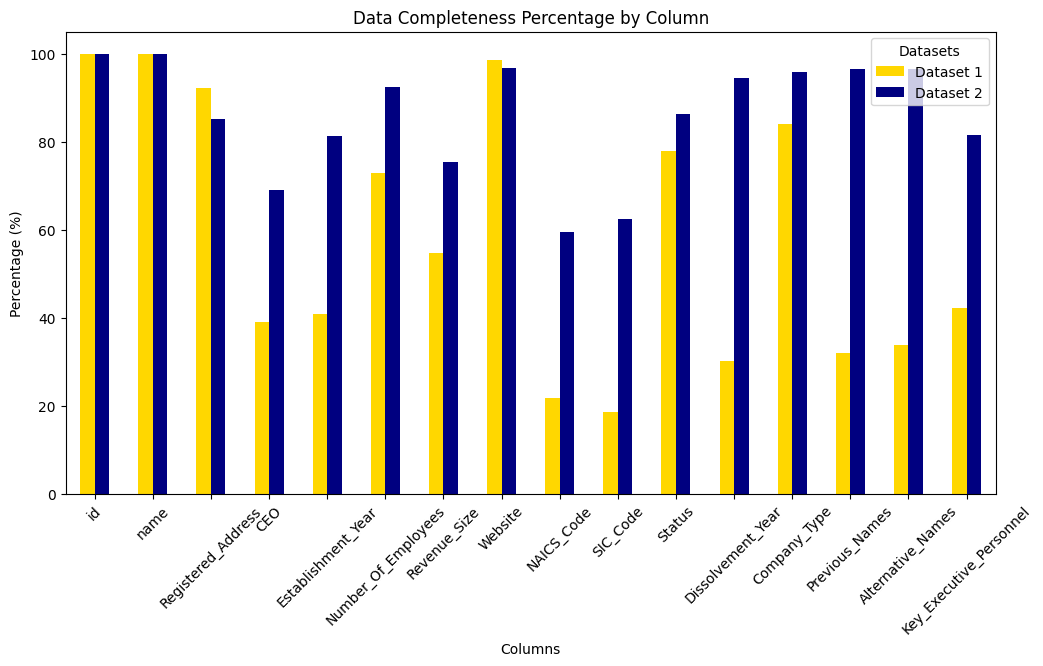

In [33]:
# Replace 'No information found' and similar values explicitly
dataset1 = dataset1.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)
dataset2 = dataset2.applymap(lambda x: pd.NA if isinstance(x, str) and 'No information found' in x else x)

# Calculate the percentage of available data
available_percentage1 = 100 - (dataset1.isna().sum() / len(dataset1)) * 100
available_percentage2 = 100 - (dataset2.isna().sum() / len(dataset2)) * 100

# Bar chart for comparison
available_comparison = pd.DataFrame({
    'Dataset 1': available_percentage1,
    'Dataset 2': available_percentage2
})

available_comparison.plot(kind='bar', figsize=(12, 6), color=['gold', 'navy'])
plt.title('Data Completeness Percentage by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.legend(title='Datasets')
plt.show()

In [11]:
file3_path = '../Results/opencorporates_reference_data.csv'

# Reading the datasets
reference_data = pd.read_csv(file3_path)

# Create a new column 'State' by extracting the last two characters of 'jurisdiction_code' and capitalizing them
reference_data['State'] = reference_data['jurisdiction_code'].str.split('_').str[-1].str.upper()

# Display the first few rows to verify the new column
reference_data[['jurisdiction_code', 'State']].head()

# Ensure the column names match for merging
dataset1.rename(columns={"Firm_Name": "name"}, inplace=True)
dataset2.rename(columns={"Firm_Name": "name"}, inplace=True)

# Prepare 'name' column for matching by removing excess spaces and normalizing case
dataset1['name'] = dataset1['name'].str.strip().str.upper()
dataset2['name'] = dataset2['name'].str.strip().str.upper()
reference_data['name'] = reference_data['name'].str.strip().str.upper()

# Merge datasets with reference data on 'name'
merged1 = dataset1.merge(reference_data[['name', 'State', 'source', 'registered_address', 'industry_codes']], on='name', how='left')
merged2 = dataset2.merge(reference_data[['name', 'State', 'source', 'registered_address', 'industry_codes']], on='name', how='left')

merged2.head()

,Unnamed: 0,id,name,Registered_Address,CEO,Establishment_Year,Number_Of_Employees,Revenue_Size,Website,NAICS_Code,...,Status,Dissolvement_Year,Company_Type,Previous_Names,Alternative_Names,Key_Executive_Personnel,State,source,registered_address,industry_codes
0,0,1,"""TRACTION POWER SYSTEMS, INC.""","8550 Mosley, Houston, TX, United States, 77075\n",<NA>,1992,<NA>,<NA>,No website found\n,335314,...,Dissolved\n,2001,Foreign For-Profit Corporation\n,N/A\n,"TRACTION POWER SYSTEMS, INC.\n",N/A\n,MD,{'publisher': 'Maryland Department of Assessme...,{'street_address': '8550 MOSLEY DRIVE\nHOUSTON...,[]
1,1,2,"""A DAY TO REMEMBER"", LLC","11 Carolyn Court, Dover, DE, USA, 19901\n",Stephen Hoffman\n,2003,<25\n,$1000000-10000000\n,http://adtr.com/\n,448120,...,Active\n,2024,LLC\n,N/A\n,ADTR\n,"Helen Dionne, Business Owner (A Day To Remembe...",IN,"{'publisher': 'Indiana Secretary of State', 'u...","{'street_address': '1121 S RACE ST, PRINCETON,...",[]
2,2,3,""" MALCO INC. -A NEVADA CORP.","3030 South Atlantic Blvd, Los Angeles, CA, USA...",Joshua Maloney\n,1982,1-10\n,10000-100000\n,http://www.brasstraditions.com/\n,<NA>,...,Inactive\n,N/A\n,Corporation\n,N/A\n,"MALCO ENTERPRISES OF NEVADA, INC.\n","Buddy Malone, Chief Executive Officer; Joe Mal...",CA,"{'publisher': 'California Secretary of State',...","{'street_address': '855 S WELLS,\nRENO, NV 895...",[]
3,3,4,.BISHOP'S GATE RESIDENTIAL MORTGAGE TRUST,"300 Delaware Avenue 9th Floor, Wilmington, DE,...",<NA>,1998,1-10\n,1000000000+\n,No website found\n,522292,...,Active\n,2008,Statutory Trust\n,CENDANT RESIDENTIAL MORTGAGE TRUST\n,CENDANT RESIDENTIAL MORTGAGE TRUST\n,<NA>,SD,{'publisher': 'South Dakota Secretary of State...,NaN,[]
4,4,5,"""J.CRESCI FARMS, L.L.C.""","3815 Hance Bridge Road, Vineland, NJ, USA, 083...",Joseph Cresci\n,2002,1-10\n,100000-1000000\n,No website found\n,111110,...,Active\n,N/A\n,LLC\n,N/A\n,J Cresci Farms LLC\n,N/A\n,NJ,{'publisher': 'State of New Jersey Division of...,NaN,[]


In [34]:
# Filter out rows where either 'State' or 'Registered_Address' is missing or invalid
filtered1 = merged1[(merged1['State'].notna()) & (merged1['Registered_Address'].notna()) & 
                    (merged1['State'] != "") & (merged1['Registered_Address'] != "")]
filtered2 = merged2[(merged2['State'].notna()) & (merged2['Registered_Address'].notna()) & 
                    (merged2['State'] != "") & (merged2['Registered_Address'] != "")]

print(filtered1.shape, filtered2.shape)

# Ensure 'State' and 'Registered_Address' are strings
filtered1['State'] = filtered1['State'].astype(str)
filtered1['Registered_Address'] = filtered1['Registered_Address'].astype(str)
filtered2['State'] = filtered2['State'].astype(str)
filtered2['Registered_Address'] = filtered2['Registered_Address'].astype(str)

# Recalculate the 'State Match' columns with filtered data
filtered1['State Match'] = filtered1.apply(lambda row: row['State'].upper() in row['Registered_Address'].upper(), axis=1)
filtered2['State Match'] = filtered2.apply(lambda row: row['State'].upper() in row['Registered_Address'].upper(), axis=1)

# Calculate match percentages considering only valid rows
filtered_match_percentage1 = filtered1['State Match'].mean() * 100
filtered_match_percentage2 = filtered2['State Match'].mean() * 100

filtered_match_percentage1, filtered_match_percentage2

(2700, 22) (2493, 22)


/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/3567444360.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['State'] = filtered1['State'].astype(str)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/3567444360.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['Registered_Address'] = filtered1['Registered_Address'].astype(str)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/3567444360.py:12: SettingWithCopyWarning: 
A value is tryin

(23.074074074074076, 60.28880866425993)

In [65]:
import ast





# Extracting the 'code' from the 'industry_codes' column
def extract_code(json_data):
    try:
        # Safely parse the JSON string into a Python object
        parsed_data = ast.literal_eval(json_data)
        # Extract the 'code' from the first 'industry_code' entry
        return parsed_data[0]['industry_code']['code'] if parsed_data else None
    except (ValueError, IndexError, KeyError, TypeError):
        return None  # Return None if the JSON is invalid or doesn't have the expected structure
    



filtered1['parsed_code'] = filtered1['industry_codes'].apply(extract_code)
filtered2['parsed_code'] = filtered2['industry_codes'].apply(extract_code)

# Filter merged datasets to keep only rows where both NAICS_Code and industry_codes are not null or empty
filtered_merged1 = filtered1[
    (filtered1['NAICS_Code'].notna()) & 
    (filtered1['industry_codes'].notna()) & 
    (filtered1['industry_codes'] != '[]') &
    (filtered1['industry_codes'] != 'nan') & 
    (filtered1['NAICS_Code'] != '<NA>')
]

filtered_merged2 = filtered2[
    (filtered2['NAICS_Code'].notna()) & 
    (filtered2['industry_codes'].notna()) & 
    (filtered2['industry_codes'] != '[]') &
    (filtered2['industry_codes'] != 'nan') & 
    (filtered2['NAICS_Code'] != '<NA>')

]

print(filtered_merged1.shape, filtered_merged2.shape)


# Ensure columns are strings for comparison
filtered_merged1['NAICS_Code'] = filtered_merged1['NAICS_Code'].astype(str)
filtered_merged1['industry_codes'] = filtered_merged1['industry_codes'].astype(str)
filtered_merged2['NAICS_Code'] = filtered_merged2['NAICS_Code'].astype(str)
filtered_merged2['industry_codes'] = filtered_merged2['industry_codes'].astype(str)

# Create a column to check if NAICS_Code matches industry_codes
filtered_merged1['NAICS Match'] = filtered_merged1.apply(
    lambda row: (row['parsed_code'] in row['NAICS_Code']) or (row['NAICS_Code'] in row['parsed_code']),
    axis=1
)
filtered_merged2['NAICS Match'] = filtered_merged2.apply(
    lambda row: (row['parsed_code'] in row['NAICS_Code']) or (row['NAICS_Code'] in row['parsed_code']),
    axis=1
)
# Calculate match percentages
naics_match_percentage1 = filtered_merged1['NAICS Match'].mean() * 100
naics_match_percentage2 = filtered_merged2['NAICS Match'].mean() * 100

print(f"Dataset 1 NAICS Match Percentage: {naics_match_percentage1:.2f}%")
print(f"Dataset 2 NAICS Match Percentage: {naics_match_percentage2:.2f}%")

(10, 24) (58, 24)
Dataset 1 NAICS Match Percentage: 30.00%
Dataset 2 NAICS Match Percentage: 44.83%


/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/156640438.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered1['parsed_code'] = filtered1['industry_codes'].apply(extract_code)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/156640438.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered2['parsed_code'] = filtered2['industry_codes'].apply(extract_code)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/156640438.py:45: SettingWithCopyWarning: 

In [58]:
# Filter rows where both 'NAICS_Match' and 'State Match' are True
filtered_merged1['Both Matches'] = filtered_merged1.apply(lambda row: row['NAICS Match'] and row['State Match'], axis=1)
filtered_merged2['Both Matches'] = filtered_merged2.apply(lambda row: row['NAICS Match'] and row['State Match'], axis=1)

# Calculate the percentages for both datasets
both_matches_percentage1 = filtered_merged1['Both Matches'].mean() * 100
both_matches_percentage2 = filtered_merged2['Both Matches'].mean() * 100

print(f"Dataset 1 Both Matches Percentage: {both_matches_percentage1:.2f}%")
print(f"Dataset 2 Both Matches Percentage: {both_matches_percentage2:.2f}%")

Dataset 1 Both Matches Percentage: 0.00%
Dataset 2 Both Matches Percentage: 32.76%


/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/2270567713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged1['Both Matches'] = filtered_merged1.apply(lambda row: row['NAICS Match'] and row['State Match'], axis=1)
/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/2270567713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged2['Both Matches'] = filtered_merged2.apply(lambda row: row['NAICS Match'] and row['State Match'], axis=1)


In [68]:
# Create a new column with the first three letters of NAICS_Code
filtered_merged2['NAICS_Prefix'] = filtered_merged2['NAICS_Code'].str[:3]

# Group by the NAICS_Prefix and calculate match percentages and counts
naics_prefix_summary = filtered_merged2.groupby('NAICS_Prefix').agg(
    Count=('NAICS Match', 'size'),
    Accuracy=('NAICS Match', 'mean')
)

# Convert accuracy to percentage
naics_prefix_summary['Accuracy (%)'] = naics_prefix_summary['Accuracy'] * 100

# Find the highest and lowest accuracy
highest_accuracy_prefix = naics_prefix_summary['Accuracy (%)'].idxmax()
highest_accuracy_value = naics_prefix_summary['Accuracy (%)'].max()

lowest_accuracy_prefix = naics_prefix_summary['Accuracy (%)'].idxmin()
lowest_accuracy_value = naics_prefix_summary['Accuracy (%)'].min()

# Print results
print("NAICS Prefix Breakdown by Count and Accuracy:")
print(naics_prefix_summary.sort_values(by='Accuracy (%)', ascending=False))

print(f"\nHighest Accuracy: {highest_accuracy_prefix} with {highest_accuracy_value:.2f}%")
print(f"Lowest Accuracy: {lowest_accuracy_prefix} with {lowest_accuracy_value:.2f}%")

NAICS Prefix Breakdown by Count and Accuracy:
              Count  Accuracy  Accuracy (%)
NAICS_Prefix                               
112               1  1.000000    100.000000
484               1  1.000000    100.000000
812               1  1.000000    100.000000
561               1  1.000000    100.000000
999               2  1.000000    100.000000
236               1  1.000000    100.000000
531              19  0.789474     78.947368
523               2  0.500000     50.000000
722               3  0.333333     33.333333
238               3  0.333333     33.333333
541               3  0.333333     33.333333
511               1  0.000000      0.000000
113               1  0.000000      0.000000
488               1  0.000000      0.000000
532               1  0.000000      0.000000
444               2  0.000000      0.000000
551               4  0.000000      0.000000
485               1  0.000000      0.000000
611               2  0.000000      0.000000
621               2  0.000000 

/var/folders/cr/687s4h5s3ndb0qw1gmsgrrlh0000gn/T/ipykernel_43096/770481383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged2['NAICS_Prefix'] = filtered_merged2['NAICS_Code'].str[:3]
